In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [3]:
%reload_ext autoreload
%autoreload 2
from projet_madi import *

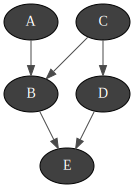

In [4]:
bn=gum.fastBN("A->B<-C->D->E<-B")
gnb.showBN(bn)

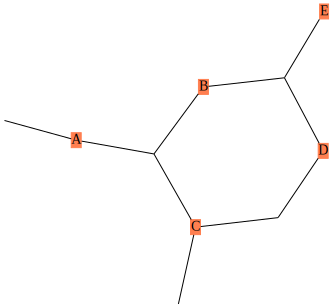

In [5]:
fg=FactorGraph()
fg.build(bn)
fg.show()

In [6]:
spi=TreeSumProductInference(fg) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages
spi.posterior("D")          # retourne la distribution de 'A' sous la forme d'un `gum.Potential`

(gum::Potential<double>@0x55c2199fb0a0) <D:0> :: 0.436636 /<D:1> :: 0.563364

In [7]:
ie = gum.LazyPropagation(bn)
ie.makeInference()
ie.posterior("D")

(gum::Potential<double>@0x55c219e97fe0) <D:0> :: 0.436636 /<D:1> :: 0.563364

In [9]:
mpi=TreeMaxProductInference(fg)
mpi.makeInference()         # effectue les calculs de tous les messages
mpi.argmax()                # retourne un dictionnaire des valeurs des variables pour le MAP

{'A': 0, 'C': 1, 'B': 0, 'D': 1, 'E': 0}

In [10]:
mpi=TreeMaxSumInference(fg) #ou TreeMaxSumInference
mpi.makeInference()         # effectue les calculs de tous les messages
mpi.argmax()                # retourne un dictionnaire des valeurs des variables pour le MAP

{'A': 0, 'C': 1, 'B': 0, 'D': 1, 'E': 0}

In [49]:
for i in bn.nodes():
    print("variable {} : {}".format(i,bn.variable(i)))
print()
for i in bn.nodes():
    print("cpt {} : {}".format(i,bn.cpt(i)))

variable 0 : A[0,1]
variable 1 : B[0,1]
variable 2 : C[0,1]
variable 3 : D[0,1]
variable 4 : E[0,1]

cpt 0 : <A:0> :: 0.585004 /<A:1> :: 0.414996
cpt 1 : <B:0|A:0|C:0> :: 0.0459456 /<B:1|A:0|C:0> :: 0.954054 /<B:0|A:1|C:0> :: 0.80245 /<B:1|A:1|C:0> :: 0.19755 /<B:0|A:0|C:1> :: 0.746539 /<B:1|A:0|C:1> :: 0.253461 /<B:0|A:1|C:1> :: 0.756277 /<B:1|A:1|C:1> :: 0.243723
cpt 2 : <C:0> :: 0.0973592 /<C:1> :: 0.902641
cpt 3 : <D:0|C:0> :: 0.580765 /<D:1|C:0> :: 0.419235 /<D:0|C:1> :: 0.144651 /<D:1|C:1> :: 0.855349
cpt 4 : <E:0|D:0|B:0> :: 0.592774 /<E:1|D:0|B:0> :: 0.407226 /<E:0|D:1|B:0> :: 0.0318466 /<E:1|D:1|B:0> :: 0.968153 /<E:0|D:0|B:1> :: 0.294828 /<E:1|D:0|B:1> :: 0.705172 /<E:0|D:1|B:1> :: 0.422301 /<E:1|D:1|B:1> :: 0.577699


In [50]:
bn.cpt(1).nbrDim()
bn.cpt(1).toarray()

array([[[0.04594559, 0.95405441],
        [0.80244963, 0.19755037]],

       [[0.74653909, 0.25346091],
        [0.75627742, 0.24372258]]])

In [75]:
bn.cpt(1).var_names

['C', 'A', 'B']

In [51]:
print((bn.cpt(0) * bn.cpt(1)))

<A:0|B:0|C:0> :: 0.0268783 /<A:1|B:0|C:0> :: 0.333014 /<A:0|B:1|C:0> :: 0.558125 /<A:1|B:1|C:0> :: 0.0819826 /<A:0|B:0|C:1> :: 0.436728 /<A:1|B:0|C:1> :: 0.313852 /<A:0|B:1|C:1> :: 0.148276 /<A:1|B:1|C:1> :: 0.101144


In [116]:
print((bn.cpt(0) * bn.cpt(1)) * bn.cpt(2))

<C:0|A:0|B:0> :: 0.00261685 /<C:1|A:0|B:0> :: 0.394209 /<C:0|A:1|B:0> :: 0.0324219 /<C:1|A:1|B:0> :: 0.283296 /<C:0|A:0|B:1> :: 0.0543386 /<C:1|A:0|B:1> :: 0.13384 /<C:0|A:1|B:1> :: 0.00798176 /<C:1|A:1|B:1> :: 0.0912967


In [66]:
fg.factors[0].var_names

['A']